Ensemble Methods
Problem Statement: Build a model that predicts the loan status of the applicant considering different factors like Age, Income, Credit history etc

Step1: Data Gathering

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/train_loan.csv'
df = pd.read_csv(path)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


Step2: Perform basic data quality checks

In [3]:
df.shape

(58645, 13)

In [4]:

df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
# missing values
df.isna().sum()


id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
# duplicated rows
df.duplicated().sum()

np.int64(0)

In [8]:
df=df.drop_duplicates()

Step3: Separate X and Y features
Y => loan_status

In [9]:

df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [10]:
X = df.drop(columns=['id','loan_status'])
Y = df[['loan_status']]

In [11]:

X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [12]:

Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


Step4: Data Preprocessing and Data Cleaning

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [14]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [15]:
print(cat)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [16]:

print(con)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [17]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)


In [18]:
con_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)


In [19]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',con_pipe,con)
]).set_output(transform='pandas')


In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298


Step6: SPlit the data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)

In [23]:
xtrain.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
49371,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.074446,-0.264855,0.075506,0.140632,0.926666,0.335502,1.039036
33104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.754307,-0.923845,0.580588,-0.758041,0.023767,0.117378,-0.698298
53030,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.571697,0.156966,-0.177035,0.931464,-0.253034,0.444564,0.790845
54909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.091305,-0.370311,-0.177035,-0.578306,1.091428,-0.427932,0.294464
27249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.571697,-0.370311,0.075506,0.050765,-0.009185,0.335502,0.294464


In [24]:
ytrain.head()

,loan_status
49371,0
33104,1
53030,0
54909,0
27249,0


Step7.1: Model Building
Bagging model : Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(
    n_estimators=5,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini'
)
model.fit(xtrain,ytrain)

,n_estimators,5
,criterion,'gini'
,max_depth,4
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
model.score(xtrain,ytrain)

0.9274021655725125

In [28]:
model.score(xtest,ytest)

0.9268479836303181

Hyperparameter tuning- overfitting scenario, choose the best parameters required for the model


In [29]:
params = {
    'n_estimators':[5,10,35,50,75,100,150],
    'max_depth':[3,5,7,9,11]
}

To perform hyperparameter tuning, I am considering RandomSearchCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
base_model = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=base_model,param_distributions=params,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

In [ ]:
rscv.best_params_

{'n_estimators': 150, 'max_depth': 11}

In [ ]:
rscv.best_score_

np.float64(0.8837841504971885)

In [ ]:
best_rfc = rscv.best_estimator_

In [ ]:
best_rfc.score(xtrain,ytrain)

0.9549620598516497

In [ ]:
best_rfc.score(xtest,ytest)

0.9508056952851905

Step8: Model Evaluation

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
ypred_test = model.predict(xtest)
ypred_test[:5]


array([0, 0, 0, 0, 1])

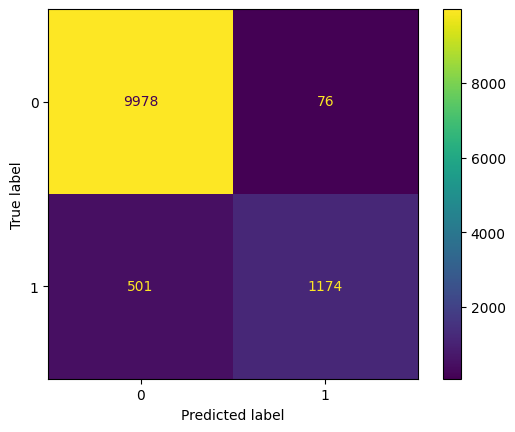

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest,ytest)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.89      0.52      0.66      1675

    accuracy                           0.92     11729
   macro avg       0.91      0.76      0.81     11729
weighted avg       0.92      0.92      0.91     11729



Let's build Gradient Boost and XGBoost. We shall choose the best model among these three